In [579]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from geopy import distance
from matplotlib.colors import ListedColormap

In [16]:
%matplotlib inline

In [31]:
df = pd.read_csv("all_analyzed.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_length,day_of_week,is_holiday,work_day,distance,rush_hour,speed,ride_length_category
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,...,-87.638506,member,11.750000,1,False,1,3.104577,1,0.264219,"(0.0, 30.0]"
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,1.883333,1,False,1,0.350123,0,0.185906,"(0.0, 30.0]"
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,7.716667,6,False,0,0.350123,0,0.045372,"(0.0, 30.0]"
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),A15541-1,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,...,-87.596471,casual,58.483333,6,False,0,8.569135,0,0.146523,"(30.0, 60.0]"
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,...,-87.652662,member,26.300000,2,False,1,5.418878,0,0.206041,"(0.0, 30.0]"


# size

In [229]:
ratio = df.groupby('member_casual').size() / len(df) * 100
ratio

member_casual
casual    38.831625
member    61.168375
dtype: float64

Text(0.5, 1.0, 'Member type percentage')

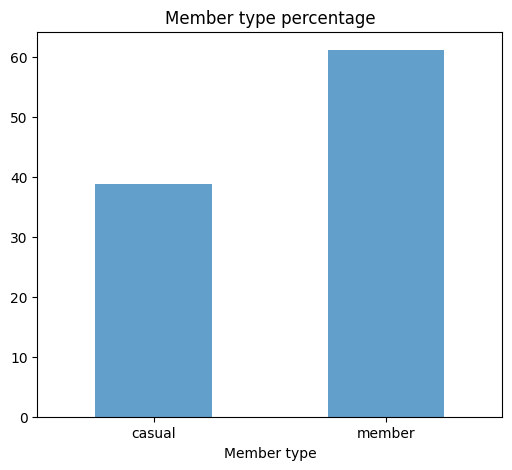

In [230]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6, 5))
ratio.plot.bar(ax=ax_ratio, alpha=0.7)
ax_ratio.set_xticklabels(["casual","member"], rotation=0) 
ax_ratio.set_xlabel('Member type')
ax_ratio.set_title('Member type percentage')

# Distance

In [828]:
dist = df.groupby('member_casual').agg({'distance': ['mean', 'median']})
dist


distance          
                   mean    median
member_casual                    
casual         2.134677  1.612688
member         2.105076  1.505767

In [829]:
dist = dist.reset_index()

(0.0, 2.4)

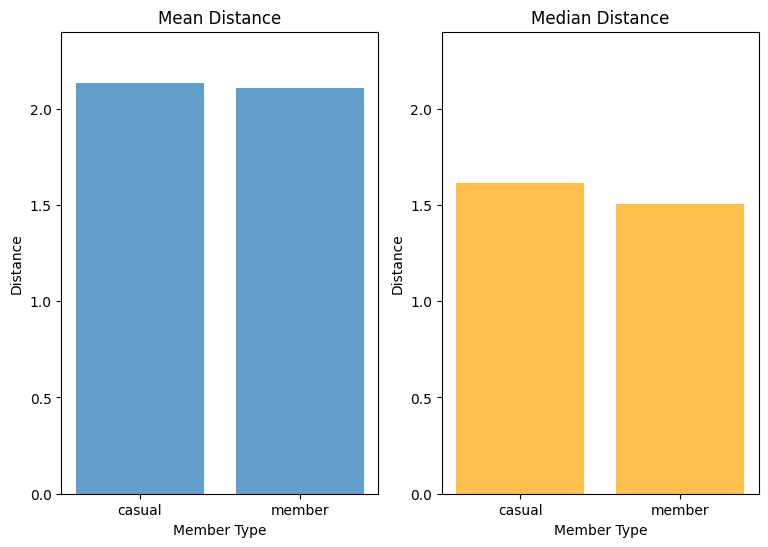

In [93]:
member_casual = dist['member_casual']
mean_distance = dist['distance']['mean']
median_distance = dist['distance']['median']

x = np.arange(len(member_casual))

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.bar(x, mean_distance, bar_width, label='Mean Distance', alpha=0.7)
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Distance')
plt.title('Mean Distance')
plt.ylim(0, 2.4)

plt.subplot(1, 2, 2)
plt.bar(x, median_distance, bar_width, label='Median Distance', alpha=0.7, color='orange')
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Distance')
plt.title('Median Distance')
plt.ylim(0, 2.4)

Text(0.75, -0.15, 'Median Distance')

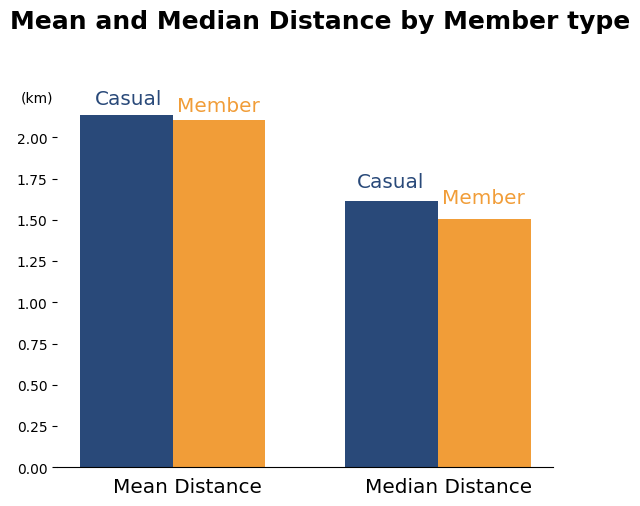

In [869]:
member_casual = dist['member_casual']
casual_dist = [dist['distance']['mean'][0], dist['distance']['median'][0]]
member_dist = [dist['distance']['mean'][1], dist['distance']['median'][1]]

x = np.arange(len(member_casual))

fig_dist, ax_dist = plt.subplots()
ax_dist.bar(x-0.15, casual_dist, 0.35, color='#294979')
ax_dist.bar(x+0.2, member_dist, 0.35, color='#F19D38')

ax_dist.set_title('Mean and Median Distance by Member type', fontsize=18, fontweight='bold', x=0.53, pad=50)

ax_dist.get_xaxis().set_visible(False)
ax_dist.set_ylabel('(km)', rotation="horizontal")
ax_dist.yaxis.set_label_coords(-0.04, 0.98)

ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

ax_dist.text(-0.27, 2.2, 'Casual',  fontsize='x-large', color='#294979')
ax_dist.text(0.72, 1.7, 'Casual',  fontsize='x-large', color='#294979')

ax_dist.text(0.04, 2.16, 'Member',  fontsize='x-large', color='#F19D38')
ax_dist.text(1.04, 1.6, 'Member',  fontsize='x-large', color='#F19D38')

ax_dist.text(-0.2, -0.15, 'Mean Distance',  fontsize='x-large')
ax_dist.text(0.75, -0.15, 'Median Distance',  fontsize='x-large')


In [877]:
dist_member = df[df['member_casual']=='member']['distance'].dropna()
dist_casual = df[df['member_casual']=='casual']['distance'].dropna()

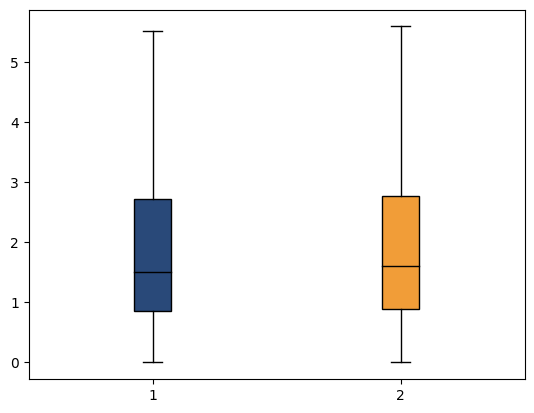

In [890]:
fig_dist, ax_dist = plt.subplots()
boxplot_dist = ax_dist.boxplot([dist_member, dist_casual], showfliers=False, patch_artist=True)

colors = ['#294979','#F19D38']
for patch, color in zip(boxplot_dist['boxes'], colors):
        patch.set_facecolor(color)
for median in boxplot_dist['medians']:
    median.set_color('black')

In [887]:
[item.get_ydata() for item in boxplot_dist['whiskers']]

[array([0.85674992, 0.        ]),
 array([2.72648916, 5.53107462]),
 array([0.89335873, 0.        ]),
 array([2.77552254, 5.59864817])]

# length of ride

In [751]:
length = df.groupby('member_casual').agg({'ride_length': ['mean', 'median']})
length

ride_length       
                     mean median
member_casual                   
casual          27.729068  12.00
member          12.379864   8.55

In [752]:
length = length.reset_index()

(0.0, 30.0)

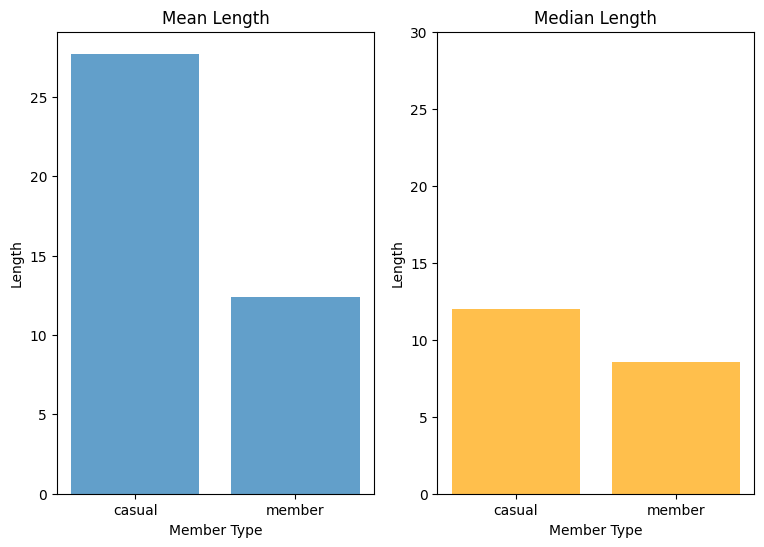

In [778]:
member_casual = length['member_casual']
mean_length = length['ride_length']['mean']
median_length = length['ride_length']['median']

x = np.arange(len(member_casual))

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.bar(x, mean_length, label='Mean Length', alpha=0.7)
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Length')
plt.title('Mean Length')
# plt.ylim(0, 2.4)

plt.subplot(1, 2, 2)
plt.bar(x, median_length, label='Median Length', alpha=0.7, color='orange')
plt.xticks(x, member_casual)
plt.xlabel('Member Type')
plt.ylabel('Length')
plt.title('Median Length')
plt.ylim(0, 30)

Text(0.75, -2, 'Median Length')

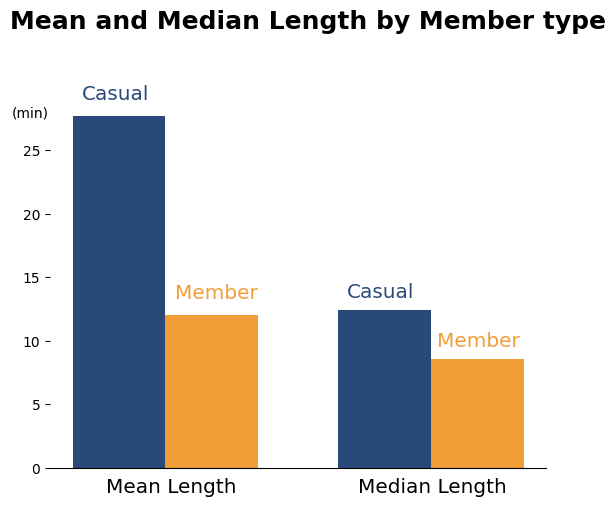

In [862]:
member_casual = length['member_casual']
mean_length = [length['ride_length']['mean'][0], length['ride_length']['mean'][1]]
median_length = [length['ride_length']['median'][0], length['ride_length']['median'][1]]

x = np.arange(len(member_casual))

fig_length, ax_length = plt.subplots()
ax_length.bar(x-0.15, mean_length, 0.35, color='#294979')
ax_length.bar(x+0.2, median_length, 0.35, color='#F19D38')

ax_length.set_title('Mean and Median Length by Member type', fontsize=18, fontweight='bold', x=0.52, pad=50)

ax_length.get_xaxis().set_visible(False)
ax_length.set_ylabel('(min)', rotation="horizontal")
ax_length.yaxis.set_label_coords(-0.04, 0.94)

ax_length.spines['top'].set_visible(False)
ax_length.spines['right'].set_visible(False)
ax_length.spines['left'].set_visible(False)

ax_length.text(-0.29, 29, 'Casual',  fontsize='x-large', color='#294979')
ax_length.text(0.71, 13.4, 'Casual',  fontsize='x-large', color='#294979')

ax_length.text(0.06, 13.3, 'Member',  fontsize='x-large', color='#F19D38')
ax_length.text(1.05, 9.55, 'Member',  fontsize='x-large', color='#F19D38')

ax_length.text(-0.2, -2, 'Mean Length',  fontsize='x-large')
ax_length.text(0.75, -2, 'Median Length',  fontsize='x-large')



# Length group

In [116]:
df['ride_length_category'] = df['ride_length_category'].astype("category")
df['ride_length_category'] = df['ride_length_category'].cat.set_categories(['(0.0, 30.0]', '(30.0, 60.0]', '(60.0, 120.0]', '(120.0, inf]'], ordered=True)

In [576]:
length_group = df.groupby(['ride_length_category', 'member_casual']).size() / df.groupby('member_casual').size() * 100
length_group

ride_length_category  member_casual
(0.0, 30.0]           casual           83.498466
                      member           94.216241
(30.0, 60.0]          casual           10.893340
                      member            5.072765
(60.0, 120.0]         casual            4.121730
                      member            0.485546
(120.0, inf]          casual            1.474790
                      member            0.216622
dtype: float64

In [577]:
length_group = length_group.unstack('ride_length_category')
length_group

ride_length_category,"(0.0, 30.0]","(30.0, 60.0]","(60.0, 120.0]","(120.0, inf]"
member_casual,,,,
casual,83.498466,10.893340,4.121730,1.474790
member,94.216241,5.072765,0.485546,0.216622


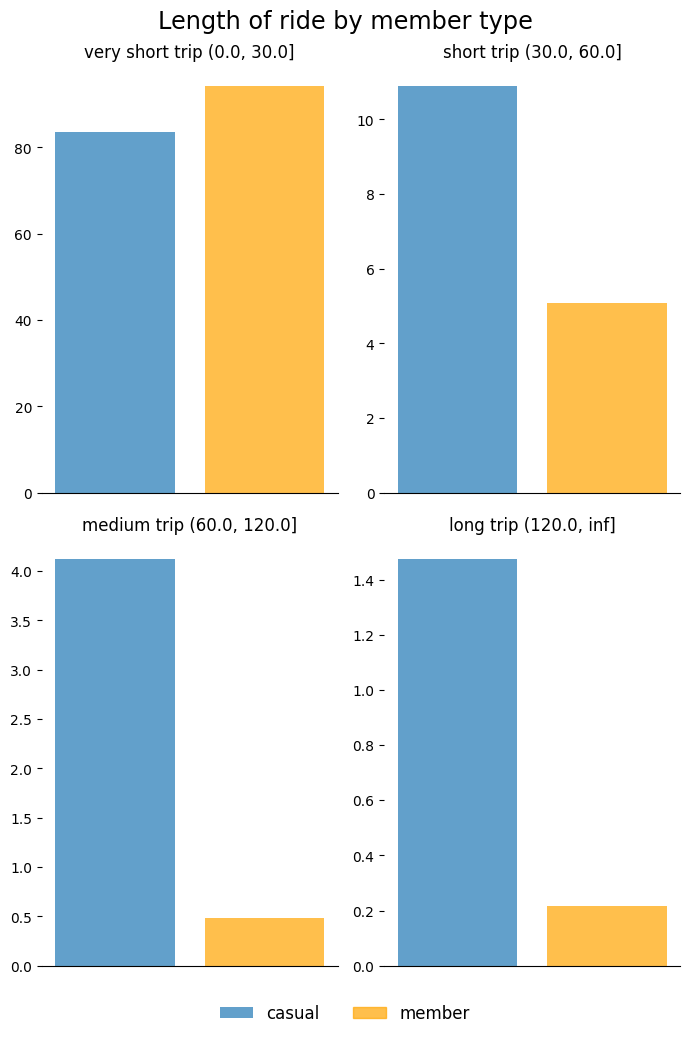

In [570]:
fig_length_group, ax_length_group = plt.subplots(2, 2, figsize=(7, 10))
x = np.arange(2)
title_dict = {0: 'very short trip (0.0, 30.0]', 1: 'short trip (30.0, 60.0]', 2: 'medium trip (60.0, 120.0]', 3: 'long trip (120.0, inf]'}

for i in range(4):
    ax_length_group[int(i//2), int(i%2)].bar(x,length_group.iloc[i], color=[(0.12, 0.47, 0.71), 'orange'], alpha=0.7)
    ax_length_group[int(i//2), int(i%2)].set_title(title_dict[i])

    ax_length_group[int(i//2), int(i%2)].get_xaxis().set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['top'].set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['right'].set_visible(False)
    ax_length_group[int(i//2), int(i%2)].spines['left'].set_visible(False)

fig_length_group.suptitle('Length of ride by member type', fontsize='xx-large')
leg = fig_length_group.legend(loc=9, labels=['casual', 'member'],  fontsize='large', frameon=False, bbox_to_anchor=(0.5, 0), ncol=2)
leg.legendHandles[1].set_color('orange')
plt.tight_layout()


Text(0.91, 47.10812029445643, '94.2%')

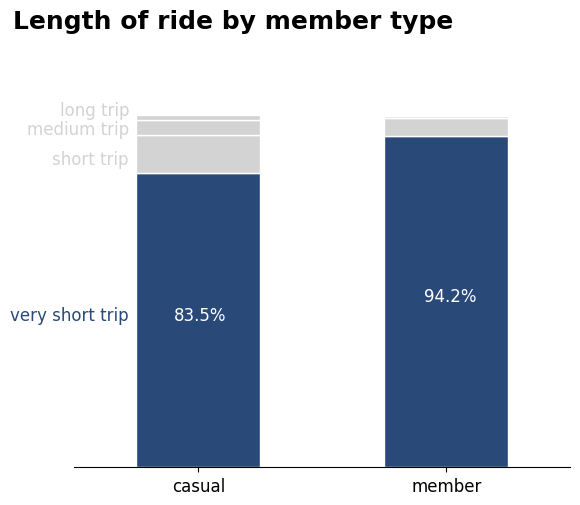

In [741]:
colors = ['#294979', 'lightgrey', 'lightgrey', 'lightgrey']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='#294979', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='lightgrey', fontsize='large')

ax_length_group.text(-0.1, length_group.iloc[0, 0]/2, str(format(length_group.iloc[0, 0], '.1f'))+'%', color='white', fontsize='large')
ax_length_group.text(0.91, length_group.iloc[1, 0]/2, str(format(length_group.iloc[1, 0], '.1f'))+'%', color='white', fontsize='large')



Text(0.94, 95, '5.1%')

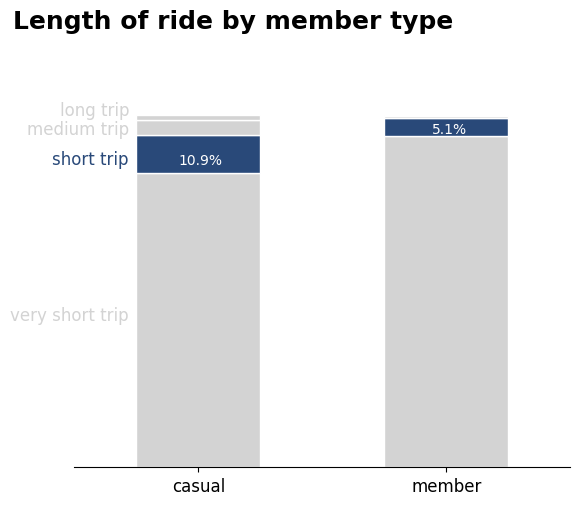

In [745]:
colors = ['lightgrey', '#294979', 'lightgrey', 'lightgrey']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='#294979', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='lightgrey', fontsize='large')

ax_length_group.text(-0.08, 86, str(format(length_group.iloc[0, 1], '.1f'))+'%', color='white')
ax_length_group.text(0.94, 95, str(format(length_group.iloc[1, 1], '.1f'))+'%', color='white')

Text(0.94, 103, '0.7%')

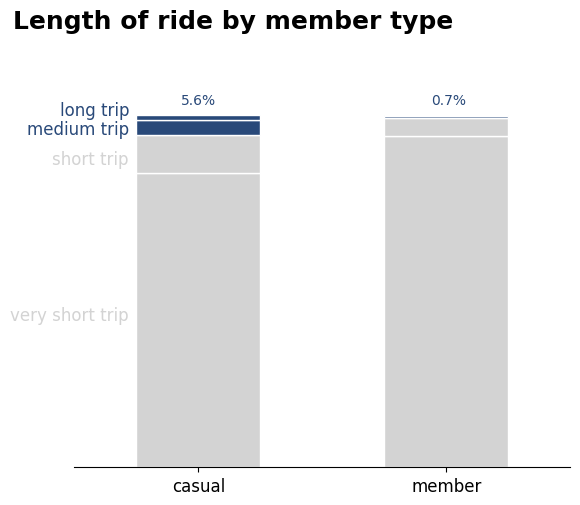

In [743]:
colors = ['lightgrey', 'lightgrey', '#294979', '#294979']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='#294979', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='#294979', fontsize='large')

ax_length_group.text(-0.07, 103, str(format(length_group.iloc[0, 2]+length_group.iloc[0, 3], '.1f'))+'%', color='#294979')
ax_length_group.text(0.94, 103, str(format(length_group.iloc[1, 2]+length_group.iloc[1, 3], '.1f'))+'%', color='#294979')

# Work day

In [234]:
work_day = df.groupby(['work_day', 'member_casual']).size() / df.groupby('work_day').size() * 100
work_day

work_day  member_casual
0         casual           48.769579
          member           51.230421
1         casual           34.814287
          member           65.185713
dtype: float64

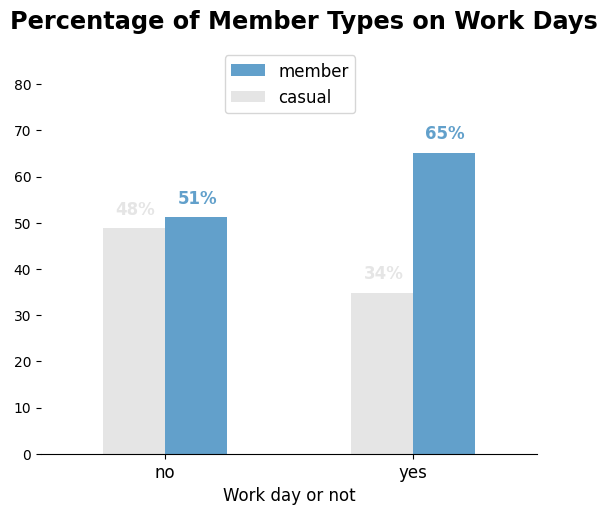

In [305]:
ax_work_day = work_day.unstack('member_casual').plot.bar(color=['grey', (0.12, 0.47, 0.71)], alpha=0.7)
for bars in ax_work_day.containers[0]:
    bars.set_alpha(0.2)
ax_work_day.set_xlabel('Work day or not', fontsize='large')
ax_work_day.set_xticklabels(["no","yes"], rotation=0, fontsize='large') 
ax_work_day.set_title('Percentage of Member Types on Work Days', fontsize='xx-large', fontweight='bold', x=0.53, pad=40)

ax_work_day.spines['top'].set_visible(False)
ax_work_day.spines['right'].set_visible(False)
ax_work_day.spines['left'].set_visible(False)

# ax_work_day.legend(loc=9)
handles, labels = ax_work_day.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax_work_day.legend(handles, labels, loc=1, fontsize='large',  bbox_to_anchor=(0.65, 1.1))
ax_work_day.axis(ymax=80)

for i, v in enumerate(work_day):
    if i % 2 == 1:
        ax_work_day.text(int(i/2)+0.05, v+3, str(int(v))+'%', color=(0.12, 0.47, 0.71), alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_work_day.text(int(i/2)-0.2, v+3, str(int(v))+'%', color='grey', alpha=0.2, fontweight='bold', fontsize='large')

Text(0.86, 6, 'work day')

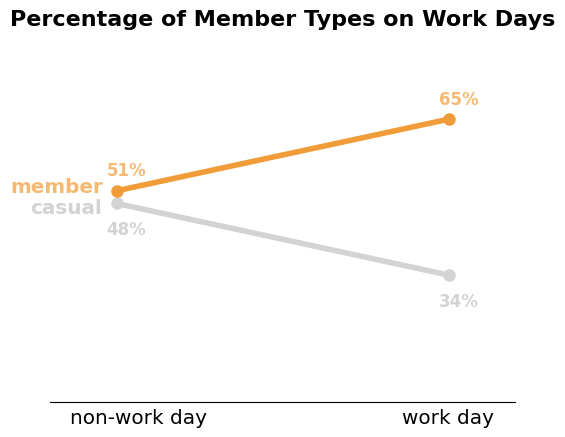

In [796]:
ax_work_day = work_day.unstack('member_casual').plot(figsize=(6, 4),color=['lightgrey', (0.94, 0.61, 0.22)], linewidth=4, marker='.', markersize=16)

# title setting
ax_work_day.set_title('Percentage of Member Types on Work Days', fontweight='bold', fontsize=16,  x=0.5, pad=50)

# set the range of x and y axis
ax_work_day.set_xlim(-0.2, 1.2)
ax_work_day.set_ylim(10, 70)

# hide x and y axis
ax_work_day.get_xaxis().set_visible(False)
ax_work_day.get_yaxis().set_visible(False)

# hide all spines
ax_work_day.spines['top'].set_visible(False)
ax_work_day.spines['right'].set_visible(False)
ax_work_day.spines['left'].set_visible(False)

# remove legend
ax_work_day.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(work_day):
    if i % 2 == 1:
        ax_work_day.text(int(i/2)-0.03, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_work_day.text(int(i/2)-0.03, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_work_day.text(-0.32, 51, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_work_day.text(-0.26, 47, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')

ax_work_day.text(-0.14, 6, 'non-work day',  fontsize='x-large')
ax_work_day.text(0.86, 6, 'work day',  fontsize='x-large')


# Rush hour

In [238]:
rush_hour = df.groupby(['rush_hour', 'member_casual']).size() / df.groupby('rush_hour').size() * 100
rush_hour

rush_hour  member_casual
0          casual           42.855196
           member           57.144804
1          casual           31.142981
           member           68.857019
dtype: float64

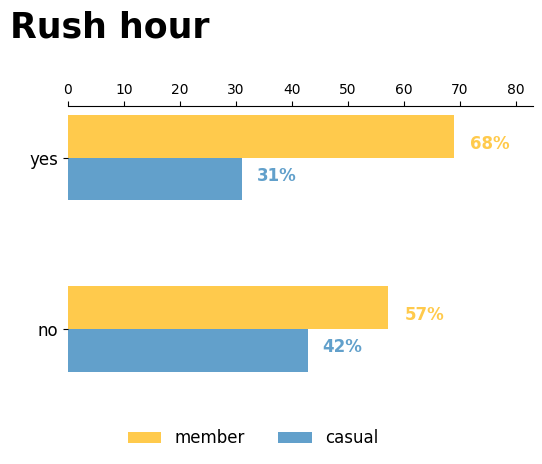

In [560]:
ax_rush_hour = rush_hour.unstack('member_casual').plot(figsize=(6, 4), kind='barh', color=[(0.12, 0.47, 0.71), '#FFB400'], alpha=0.7, width=0.5)
# for bars in ax_rush_hour.containers[0]:
#     bars.set_alpha(0.2)
ax_rush_hour.set_title("Rush hour", fontweight='bold', fontsize=25, x=0.09, pad=50)
# ax.set_ylabel('Rush hour\n or not', fontsize=14, rotation=0, labelpad=30)
ax_rush_hour.set_ylabel('')
ax_rush_hour.set_yticklabels(['no', 'yes'], rotation=0, fontsize=12)
ax_rush_hour.xaxis.tick_top()
# ax.get_xaxis().set_visible(False)
# ax.spines['top'].set_visible(False)
ax_rush_hour.spines['right'].set_visible(False)
ax_rush_hour.spines['left'].set_visible(False)
ax_rush_hour.spines['bottom'].set_visible(False)

handles, labels = ax_rush_hour.get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax_rush_hour.legend(handles, labels, loc=0, fontsize='large', frameon=False, bbox_to_anchor=(0.7, 0), ncol=2)

ax_rush_hour.axis(xmax=83, ymax=1.3)
for i, v in enumerate(rush_hour):
    if i % 2 == 1:
        ax_rush_hour.text(v+3, int(i/2)+0.05, str(int(v))+'%', color='#FFB400', fontweight='bold', fontsize='large', alpha=0.7)
    else:
        ax_rush_hour.text(v+2.5, int(i/2)-0.135, str(int(v))+'%', color=(0.12, 0.47, 0.71), fontweight='bold', fontsize='large', alpha=0.7)

Text(0.86, 6, 'rush hour')

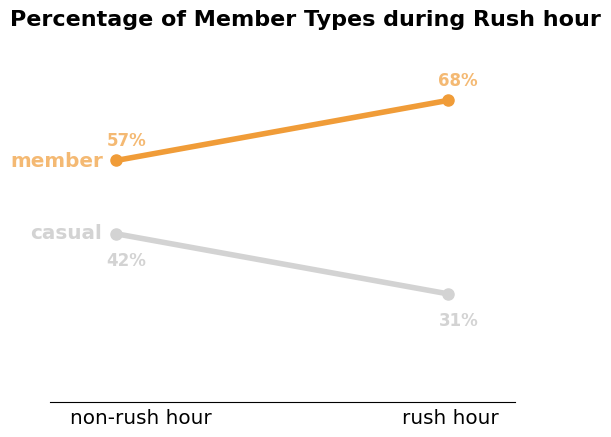

In [795]:
ax_rush_hour = rush_hour.unstack('member_casual').plot(figsize=(6, 4),  color=['lightgrey', (0.94, 0.61, 0.22)], linewidth=4, marker='.', markersize=16)

# title setting
ax_rush_hour.set_title('Percentage of Member Types during Rush hour', fontweight='bold', fontsize=16,  x=0.55, pad=50)

# set the range of x and y axis
ax_rush_hour.set_xlim(-0.2, 1.2)
ax_rush_hour.set_ylim(10, 70)

# hide x and y axis
ax_rush_hour.get_xaxis().set_visible(False)
ax_rush_hour.get_yaxis().set_visible(False)

# hide all spines
ax_rush_hour.spines['top'].set_visible(False)
ax_rush_hour.spines['right'].set_visible(False)
ax_rush_hour.spines['left'].set_visible(False)

# remove legend
ax_rush_hour.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(rush_hour):
    if i % 2 == 1:
        ax_rush_hour.text(int(i/2)-0.03, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_rush_hour.text(int(i/2)-0.03, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_rush_hour.text(-0.32, 56, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_rush_hour.text(-0.26, 42, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')

ax_rush_hour.text(-0.14, 6, 'non-rush hour',  fontsize='x-large')
ax_rush_hour.text(0.86, 6, 'rush hour',  fontsize='x-large')


In [566]:
df.groupby(['rush_hour', 'member_casual']).size() / df.groupby(['member_casual']).size()

rush_hour  member_casual
0          casual           0.724484
           member           0.613282
1          casual           0.275516
           member           0.386718
dtype: float64

# Year

In [611]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['month'] = df['started_at'].dt.strftime('%Y-%m')

In [612]:
df.groupby(['member_casual', 'month']).size() 

member_casual  month  
casual         2022-07    406055
               2022-08    358924
               2022-09    296697
               2022-10    208989
               2022-11    100772
               2022-12     44894
               2023-01     40008
               2023-02     43016
               2023-03     62201
               2023-04    147285
               2023-05    234181
               2023-06    301230
member         2022-07    417433
               2022-08    427008
               2022-09    404642
               2022-10    349696
               2022-11    236963
               2022-12    136912
               2023-01    150293
               2023-02    147429
               2023-03    196477
               2023-04    279305
               2023-05    370646
               2023-06    418388
dtype: int64

In [613]:
month = df.groupby(['member_casual', 'month']).size() / df.groupby(['month']).size() * 100
month

member_casual  month  
casual         2022-07    49.309158
               2022-08    45.668582
               2022-09    42.304364
               2022-10    37.407305
               2022-11    29.837595
               2022-12    24.693354
               2023-01    21.023536
               2023-02    22.587099
               2023-03    24.045725
               2023-04    34.526126
               2023-05    38.718675
               2023-06    41.859709
member         2022-07    50.690842
               2022-08    54.331418
               2022-09    57.695636
               2022-10    62.592695
               2022-11    70.162405
               2022-12    75.306646
               2023-01    78.976464
               2023-02    77.412901
               2023-03    75.954275
               2023-04    65.473874
               2023-05    61.281325
               2023-06    58.140291
dtype: float64

Text(11.2, 41, 'casual')

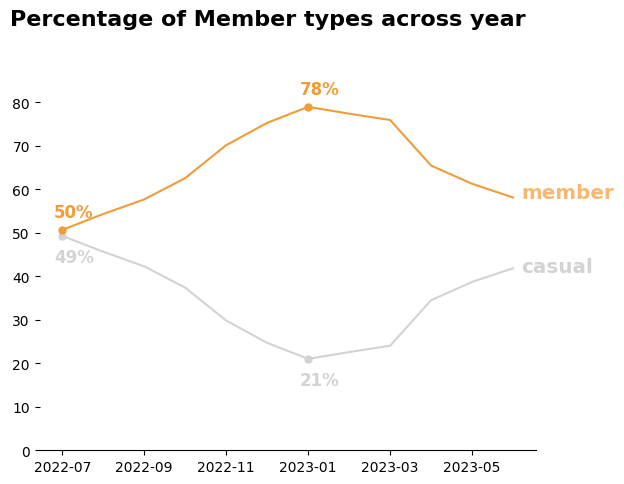

In [644]:
ax_month = month.unstack('member_casual').plot(color=['lightgrey', (0.94, 0.61, 0.22)], marker='.', markevery=[0, 6], markersize=10)

ax_month.set_title('Percentage of Member types across year', fontweight='bold', fontsize=16,  x=0.46, pad=40)
ax_month.set_ylim(0, 85)
ax_month.set_xlabel('')
# hide all spines
ax_month.spines['top'].set_visible(False)
ax_month.spines['right'].set_visible(False)
ax_month.spines['left'].set_visible(False)
# ax_rush_hour.spines['bottom'].set_visible(False)

# remove legend
ax_month.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(month):
    if i % 6 == 0:
        if i > 6:
            ax_month.text(i-12.2, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), fontweight='bold', fontsize='large')
        else:
            ax_month.text(i-0.2, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_month.text(11.2, 58, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_month.text(11.2, 41, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')


In [664]:
df_member = df[df['member_casual']=='member']
df_casual = df[df['member_casual']=='casual']
month_member = df_member.groupby('month').size() / len(df_member) * 100
month_casual = df_casual.groupby('month').size() / len(df_casual) * 100

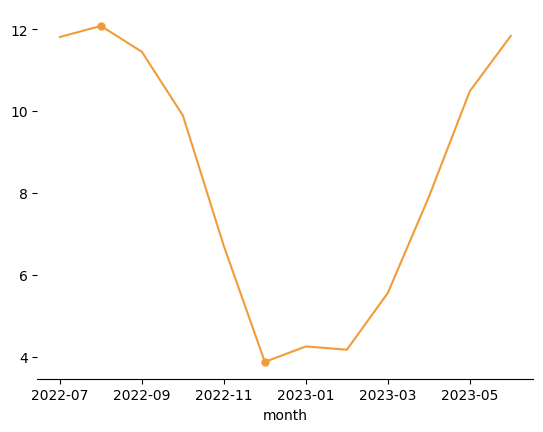

In [670]:
ax_month_member = month_member.plot(color=[(0.94, 0.61, 0.22)], marker='.', markevery=[1, 5], markersize=10)

ax_month_member.spines['top'].set_visible(False)
ax_month_member.spines['right'].set_visible(False)
ax_month_member.spines['left'].set_visible(False)

<AxesSubplot:xlabel='month'>

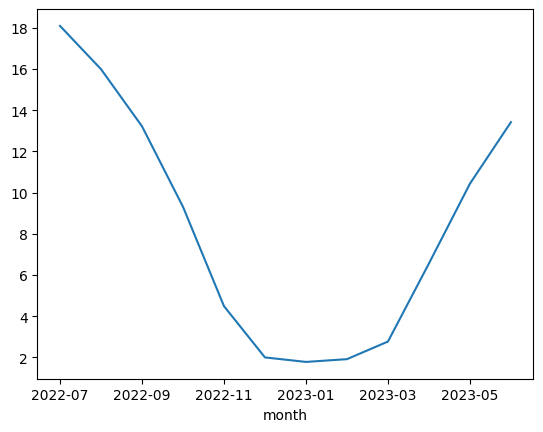

In [666]:
month_casual.plot()